In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tarfile
import urllib
dataset_path = os.path.join("dataset")
download_url="https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz" 
def fetch_data(download_url= download_url, dataset_path= dataset_path):
    os.makedirs(dataset_path, exist_ok= True)
    tgz_path = os.path.join(dataset_path, "housing.tgz")
    urllib.request.urlretrieve(download_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path= dataset_path)
    housing_tgz.close()
fetch_data()
def load_data(dataset_path= dataset_path):
    csv_path = os.path.join(dataset_path, "housing.csv")
    return pd.read_csv(csv_path)
housing_data = load_data()
df=housing_data
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [56]:
print(df.isnull().sum())
df.isnull().sum().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


207

**Filling the missing values with average values**

In [57]:
a=df.pop('ocean_proximity')
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer.fit(df)
df=imputer.transform(df)
df=pd.DataFrame(df,columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [58]:
df.isnull().sum().sum()

0

In [59]:
b=df.pop('median_house_value')
df['rooms_per_household']=df['total_rooms']/df['households']
df['bedrooms_per_room']=df['total_bedrooms'] / df['total_rooms']
df['population_per_household']=df['population']/df['households']
df['ocean_proximity']=a
df['median_house_value']=b
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,NEAR BAY,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,NEAR BAY,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,NEAR BAY,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,NEAR BAY,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,NEAR BAY,342200.0


**Splitting the dataset into x and y where x has contains dependent variable and y contains independent variable** 

In [60]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

**Encoding the categorical data which here is ocean proximity**

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
c=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[11])],remainder='passthrough')
x=np.array(c.fit_transform(x))

**Splitting the dataset into training and test set where training set is 80% and test set is 20%**

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)


In [63]:
print(x_train[0])

[0.0 0.0 0.0 1.0 0.0 -122.43 37.71 52.0 1410.0 286.0 879.0 282.0 3.1908
 5.0 0.2028368794326241 3.117021276595745]


**SCALING THE DATA USING STANDARD SCALING METHOD**

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train[:,5:13]=sc.fit_transform(x_train[:,5:13])
x_test[:,5:13]=sc.fit_transform(x_test[:,5:13])

In [65]:
print(x_train[0])

[0.0 0.0 0.0 1.0 0.0 -1.4225094202651083 0.9722904618294769
 1.8589029704653197 -0.5649768390595298 -0.6041999058296312
 -0.48611380327883963 -0.5715938469084768 -0.3623260524334147 5.0
 0.2028368794326241 3.117021276595745]


**Using Linear Regression**

In [66]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [67]:
y_pred=regressor.predict(x_test)


In [68]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.638158642104175

In [69]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

49983.347942849185

# EDA

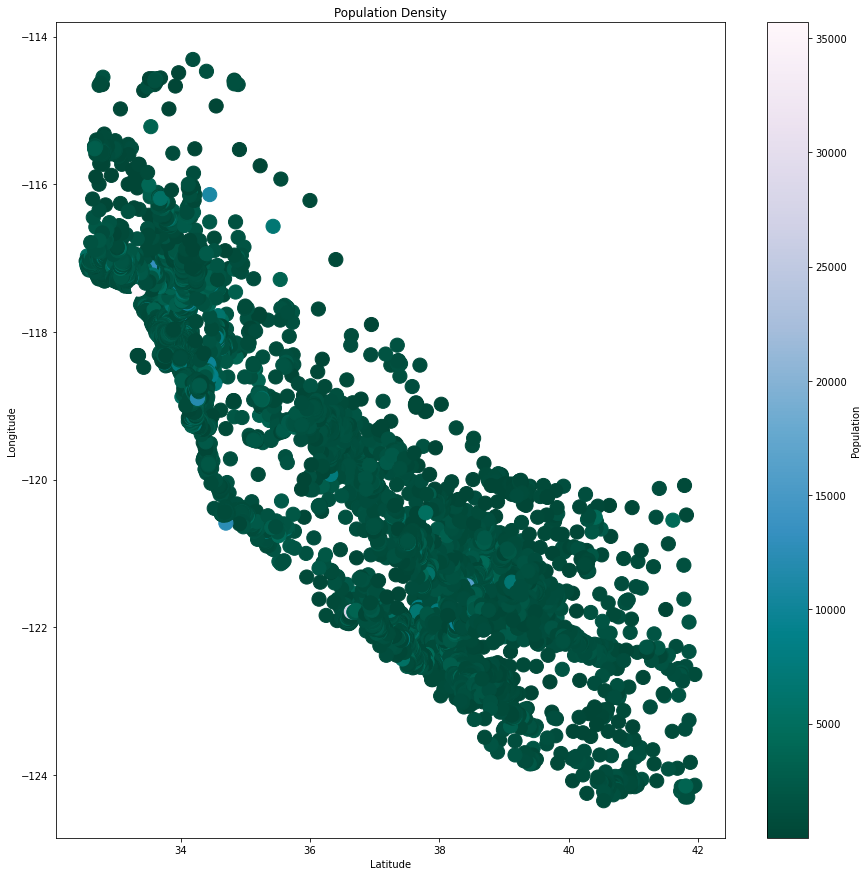

In [91]:
plt.figure(figsize=(15,15))
lat=df['latitude']
long=df['longitude']
pop=df['population']
plt.scatter(lat,long, c=pop, cmap='PuBuGn_r',s=200,alpha=1)
plt.colorbar().set_label("Population")
plt.title('Population Density')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

**INFERENCE :**  Areas under **latitude 119 to 122 and longitude 34 to 36** are scarcely populated.
                  Rest areas have a population **< 5000**

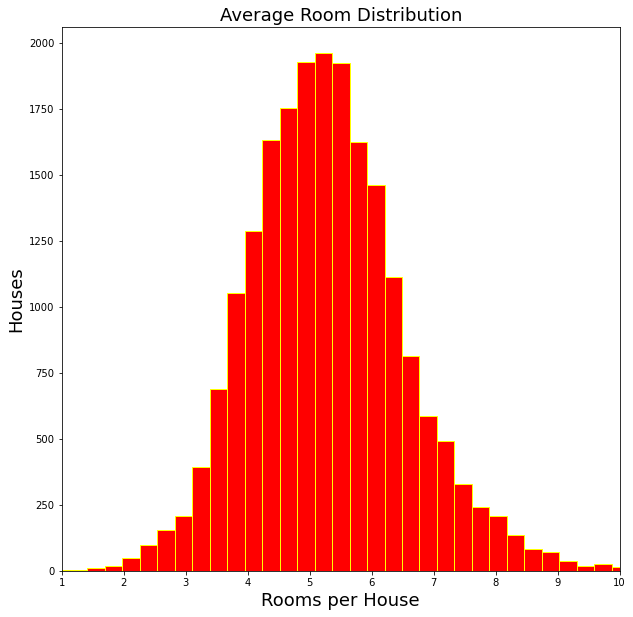

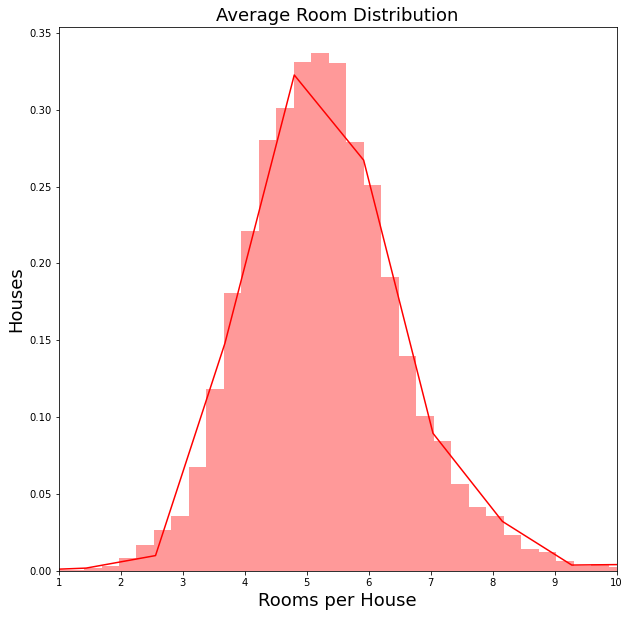

In [93]:
plt.figure(figsize=(10, 10))
plt.hist(df['rooms_per_household'],bins=500, ec = 'yellow' ,color = 'red')
plt.xlabel('Rooms per House', fontsize=18)
plt.ylabel('Houses', fontsize=18)
plt.title('Average Room Distribution', fontsize=18)
plt.xlim(1, 10)
plt.show()

plt.figure(figsize=(10, 10))
sns.distplot(df['rooms_per_household'], bins=500,color = 'red')
plt.xlabel('Rooms per House', fontsize=18)
plt.ylabel('Houses', fontsize=18)
plt.title('Average Room Distribution', fontsize=18)
plt.xlim(1, 10)
plt.show()

**INFERENCE :** Most of the houses have 4 to 6 rooms with 5 being most common

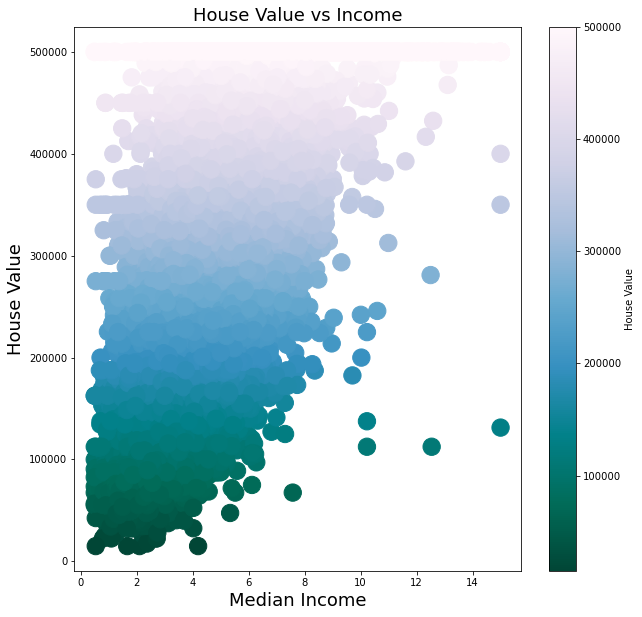

In [105]:
location = df['ocean_proximity'].value_counts()
plt.figure(figsize=(10,10))
x1=df['median_income']
y1=df['median_house_value']
plt.scatter(x1,y1,c=y1, cmap='PuBuGn_r',alpha=1,s=300)
plt.colorbar().set_label('House Value')
plt.title('House Value vs Income',fontsize=18)
plt.xlabel('Median Income',fontsize=18)
plt.ylabel('House Value',fontsize=18)
plt.show()

**INFERENCE :** Most People with median income of 0 to 4 can afford hosue with value upto 100000 

Text(0.5, 1.0, 'Correlation Matrix')

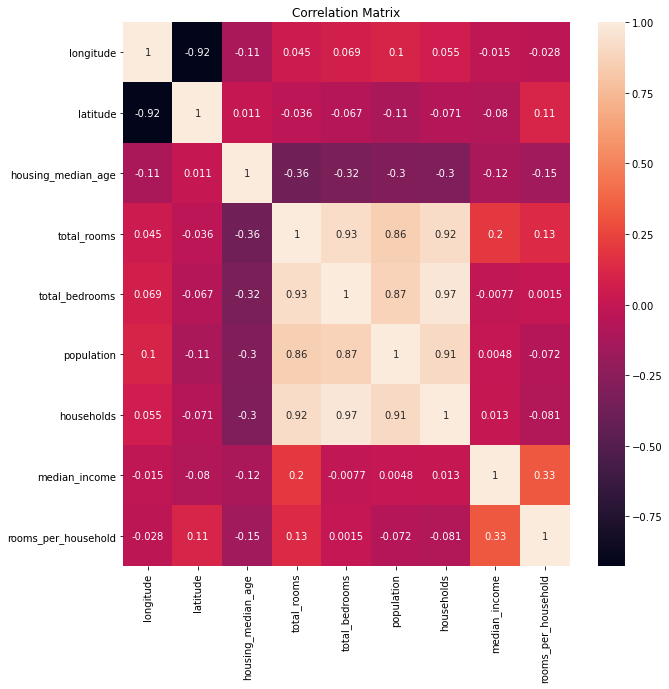

In [83]:
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,:9].corr(),annot=True)
plt.title("Correlation Matrix")

**INFERENCE :** Total rooms, total bedrooms, population and households are highly correlated

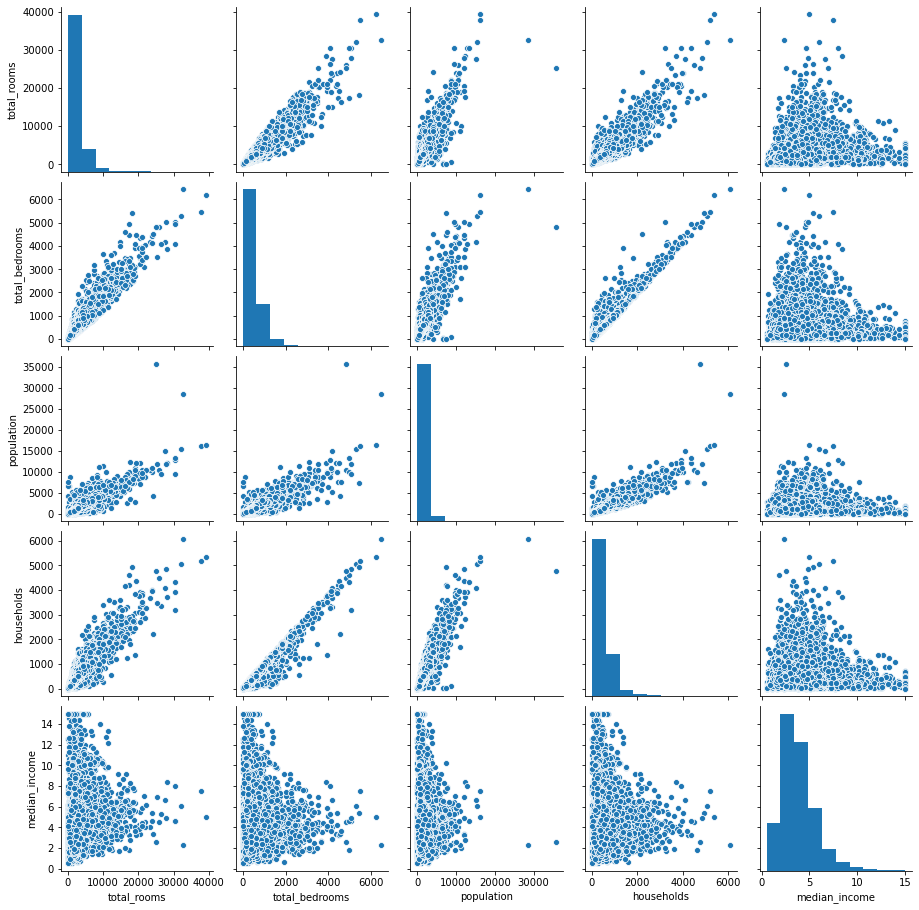

In [86]:
sns.pairplot(housing_data.iloc[:,3:8])

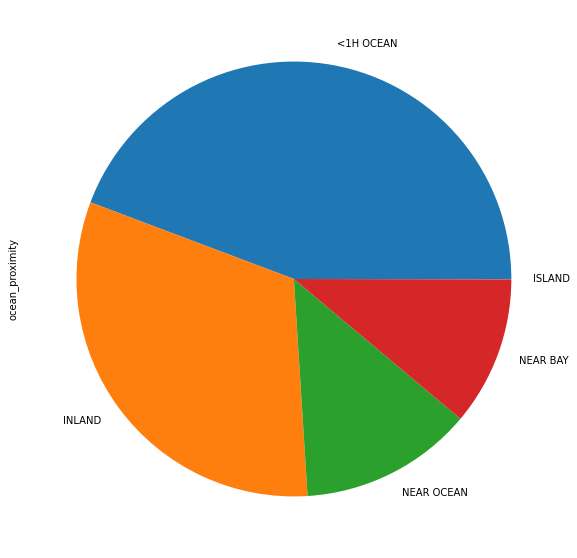

In [88]:
plt.figure(figsize=(10,10))
df['ocean_proximity'].value_counts().plot.pie()
plt.show()

**INFERENCE :** Areas which are <1H Ocean are highly populated and Island has the least population 